In [2]:
import sympy
import sympy.plotting as plt
import scipy.constants as constants

ポテンシャル、波数、badlands関数の定義:
$$
\begin{eqnarray}
V(r) &=& \frac{l(l+1)}{r^2} -\frac{2\mu}{r^3/C_3 + r^4/C_4 + r^6/C_6 + r^7/C_7}\tag{1} \\
k(r) &=& \sqrt{k_0^2 - V(r)}\tag{2} \\
B(r) &=& \frac{3}{4k(r)^4}\left(\frac{dk(r)}{dr}\right)^2-\frac{1}{2k(r)^3}\frac{d^2k(r)}{dr^2}\tag{3} \\
\end{eqnarray}
\\
M:入射原子の質量(原子単位系)
$$

In [5]:
import numpy as np
N_A = constants.N_A
atomic_unit_v = constants.physical_constants['atomic unit of velocity'][0]
atomic_unit_m = constants.physical_constants['atomic unit of mass'][0]
atom_number_Rb = 85.4678

atom_number_Rb = 22.99
M = atom_number_Rb/(N_A*atomic_unit_m*10**(3))

def convertToAtomicWaveNumber(v):
    '速度[m/s]の入力に対して原子単位系での波数[1/a0]を出力'
    return (v/atomic_unit_v)*M

k1 = convertToAtomicWaveNumber(1*10**(-5))
k2 = convertToAtomicWaveNumber(2*10**(-5))
k3 = convertToAtomicWaveNumber(4*10**(-5))
print(k1,k2,k3)
print(M)

1.9156362235276626e-07 3.831272447055325e-07 7.66254489411065e-07
41908.206288571855


155798.26852676822

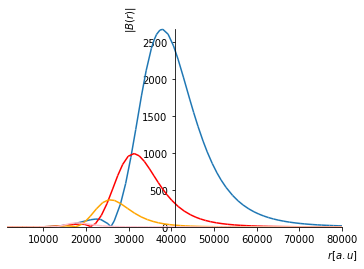

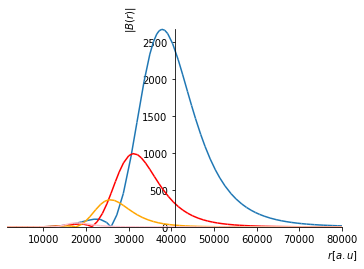

In [13]:
R = 1417
r = sympy.Symbol('r')
l = sympy.Symbol('l')
m = sympy.Symbol('m')
k0 = sympy.Symbol('k0')
C_3 = 0.733
C_4 = 1.17*10**3
C_6 = 6.60*R**3
C_7 = 3.87*10**4*R**3

def Ul(r,l):
    return l*(l+1)*r**(-2)

dUl = sympy.diff(Ul(r,l),r)
ddUl = sympy.diff(dUl,r)


def U(r):
    return -2*M/((r**3/C_3)+(r**4/C_4)+(r**6/C_6)+(r**7/C_7))

dU = sympy.diff(U(r),r)
ddU = sympy.diff(dU,r)


def V(r,l):
    'ポテンシャル(1)式'
    return U(r-R) + Ul(r,l)

dV = sympy.diff(V(r,l),r)
ddV = sympy.diff(dV,r)


def k(r, k0, l):
    '波数(2)式'
    return sympy.sqrt(k0**2 - V(r,l))

dk = sympy.diff(k(r,k0,l),r)
ddk = sympy.diff(dk,r)


def badlands(r,k0,l):
    'badlands関数(3)式'
    return sympy.Abs((3/4)*k(r,k0,l)**(-4)*dk**2 - (1/2)*k(r,k0,l)**(-3)*ddk)


B1 = badlands(r,k0,l).subs([(k0,k1),(l,0)])
B2 = badlands(r,k0,l).subs([(k0,k2),(l,0)])
B3 = badlands(r,k0,l).subs([(k0,k3),(l,0)])

k4 = convertToAtomicWaveNumber(1.5*10**(-4))
B4 = badlands(r,k0,l).subs([(k0,k4),(l,0)])

fig = plt.plot(B1,B2,B3,B4,(r,1500,80000),ylabel=r'$|B(r)|$',show = False,xlabel=r'$r[a.u]$')
fig[1].line_color = 'red'
fig[2].line_color = 'orange'
fig[3].line_color = 'pink'
fig.show()
fig.save('img.png')

1.0682375834616196e-05


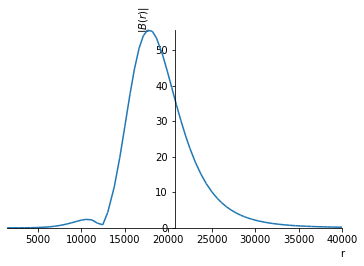

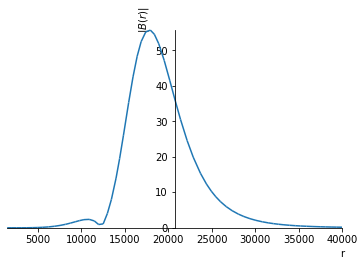

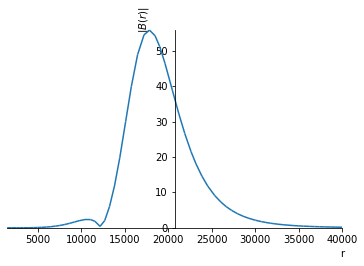

In [5]:
k4 = convertToAtomicWaveNumber(1.5*10**(-4))
print(k4)
B4 = badlands(r,k0,l).subs([(k0,k4),(l,0)])

start = 1500
end = 40000
fig = plt.plot(B4, (r,start,end),ylabel=r'$|B(r)|$')
fig.show()
fig.save('k4_{}-{}.png'.format(start,end))

In [6]:
Ndelta = float('{:e}'.format(2000/(8*k4)))
N = Ndelta
print('{:e}'.format(N))

2.340303e+07


In [7]:
T = (M*9*10**(-31)*120**2)/(2*1.3*10**(-23))
print(M)
M = M*9*10**(-31)
print(M)

155798.26852676822
1.4021844167409141e-25


In [7]:
from tqdm import tqdm
import time

In [6]:
for i in tqdm(range(100)):
    time.sleep(0.1)

100%|██████████| 100/100 [00:10<00:00,  9.70it/s]
